#============================================================================================================================================
# **Física Teórica 3 (Mecánica Estadística): Teórica 14 - Extras**
#============================================================================================================================================

# Grupo de renormalización
Este notebook busca los ceros de la transformación del grupo de renormalización para el modelo de Ising en dos dimensiones. La relación de recurrencia para este problema es K'=(3/8) ln(cosh(4K)). Recuerden ejecutar cada celda con SHIFT+ENTER.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

def f(x):														  # Definimos la función a la que le queremos buscar los ceros
	return x - 3*np.log(np.cosh(4*x))/8

# Usamos el método de la secante para encontrar el cero
x = 1 # Guess inicial
x0 = newton(f, x, tol=1.48e-08)
print('Cero de la función:', x0)

Cero de la función: 0.5069810190775701


In [ ]:
f(x0) # Verifiquemos el valor de la función en x0

-1.5543122344752192e-15

In [ ]:
print('kTc/J (Bragg-Williams) =', 4) 												 # Comparemos contra los resultados exactos, y de campo medio
print('kTc/J (Bethe)          =', 2/np.log(2))
print('kTc/J (RG)             =', 1/x0)
print('kTc/J (exacto)         =', 2/np.arctanh(np.sqrt(.5)))

kTc/J (Bragg-Williams) = 4
kTc/J (Bethe)          = 2.8853900817779268
kTc/J (RG)             = 1.9724604321863104
kTc/J (exacto)         = 2.2691853142130216


Veamos que este un punto fijo inestable. Perturbamos ligeramente al valor alrededor del cero, e iteramos la transformación del grupo de renormalización.

In [ ]:
nit = 100  # Número de interaciones
eps = 1e-8 # Amplitud de la perturbación inicial
kp = np.zeros(nit)
k  = np.zeros(nit)

k[0]  = x0 + eps											  # Iteramos la transformación desde el entorno del punto fijo
kp[0] = k[0]
for i in range(1,nit):
	k[i]  = kp[i-1]
	kp[i] = 3*np.log(np.cosh(4*k[i-1]))/8

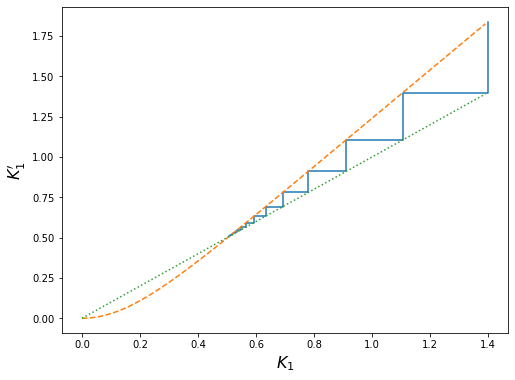

In [ ]:
plt.figure(figsize=(8,6))								  # Graficamos el resultado
x = np.arange(0,np.max(k),.01)
plt.plot(k,kp)
plt.plot(x,3*np.log(np.cosh(4*x))/8,'--')
plt.plot(x,x,':')
plt.xlabel(r'$K_1$',fontsize=16)
plt.ylabel(r'$K^\prime_1$',fontsize=16)
plt.show()

#———————————————————————————————————————————————————————————————————————————————————————————————

#———————————————————————————————————————————————————————————————————————————————————————————————